In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import trapezoid, simpson, romberg, quad

# Laboratorio 06: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Simón Cortés Ocampo
*Métodos computacionales 2024-II*

---

#1

Usando los métodos trapezoidal, Simpson y cuadratura encuentre el valor de las siguientes integrales:

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

In [2]:
#integrales simples

def trapezoidal(f, a, b, tol = 1e-5, max_iter=100):
  n = 2
  x = np.linspace(a,b,n)
  y = f(x)
  integral = trapezoid(y, x)
  for i in range(max_iter):
    n *= 2
    x = np.linspace(a,b,n)
    y = f(x)
    new_integral = trapezoid(y, x)
    if abs(new_integral - integral) < tol:
      return new_integral, n
    integral = new_integral
  return integral, n

def simpson_(f,a,b,tol=1e-5,max_iter=100):
  n = 2
  x = np.linspace(a,b,n)
  y = f(x)
  integral = simpson(y,x=x)
  for i in range(max_iter):
    n *= 2
    x = np.linspace(a,b,n)
    y = f(x)
    new_integral = simpson(y,x=x)
    if abs(new_integral - integral) < tol:
      return new_integral, n
    integral = new_integral
  return integral, n

def cuadratura(f,a,b,tol=1e-5,max_iter=100):
  integral = quad(f,a,b)[0]
  return integral

In [4]:
#integrales dobles

def doble_integral_trap(f,a,b,c,d,tol=1e-5,max_iter=100):
  x, y = sp.symbols('x y')
  integral1 = sp.integrate(f, (y, c, d))

  f_num = sp.lambdify(x, integral1, 'numpy')
  n = 2
  x = np.linspace(a,b,n)
  y = f_num(x)
  integral = trapezoid(y, x)

  for i in range(max_iter):
    n *= 2
    x = np.linspace(a,b,n)
    y = f_num(x)
    new_integral = trapezoid(y, x)
    if abs(new_integral - integral) < tol:
      return new_integral, n
    integral = new_integral

  return integral, n


def doble_integral_simpson(f,a,b,c,d,tol=1e-5,max_iter=100):
  x, y = sp.symbols('x y')
  integral1 = sp.integrate(f, (y, c, d))

  f_num = sp.lambdify(x, integral1, 'numpy')
  n = 2
  x = np.linspace(a,b,n)
  y = f_num(x)
  integral = simpson(y, x=x)

  for i in range(max_iter):
    n *= 2
    x = np.linspace(a,b,n)
    y = f_num(x)
    new_integral = simpson(y, x=x)
    if abs(new_integral - integral) < tol:
      return new_integral, n
    integral = new_integral

  return integral, n


def doble_integral_quad(f,a,b,c,d,tol=1e-5,max_iter=100):
  x, y = sp.symbols('x y')
  integral1 = sp.integrate(f, (y, c, d))

  f_num = sp.lambdify(x, integral1, 'numpy')
  integral = quad(f_num, a, b)

  return integral, n

In [5]:
print('Método Trapezoidal:')
print()

f1 = lambda x : 1/np.sqrt(np.tan(x))
a = 1e-5
b = (np.pi/2) - a
integral_1t, n = trapezoidal(f1,a,b)
print(f'El valor de la integral 1 es: {integral_1t} con n = {n}')

f2 = lambda x: np.cos(x)/x**3
a = 1
b = 1000
integral_2t, n = trapezoidal(f2,a,b)
print(f'El valor de la integral 2 es: {integral_2t} con n = {n}')

x, y = sp.symbols('x y')
f = 1/sp.sqrt(1 - y**2)
a = 1e-5
b = np.pi/4
c = 0
d = sp.sin(x)
integral_3t, n = doble_integral_trap(f,a,b,c,d)
print(f'El valor de la integral 3 es: {integral_3t} con n = {n}')

Método Trapezoidal:

El valor de la integral 1 es: 2.2151198453109417 con n = 1048576
El valor de la integral 2 es: 0.0181206028689657 con n = 262144
El valor de la integral 3 es: 0.30842513748404243 con n = 4


In [6]:
print('Método de Simpson:')
print()

f1 = lambda x : 1/np.sqrt(np.tan(x))
a = 1e-5
b = (np.pi/2) - a
integral_1s, n = simpson_(f1,a,b)
print(f'El valor de la integral 1 es: {integral_1s} con n = {n}')

f2 = lambda x: np.cos(x)/x**3
a = 1
b = 1000
integral_2s, n = simpson_(f2,a,b)
print(f'El valor de la integral 2 es: {integral_2s} con n = {n}')

x, y = sp.symbols('x y')
f = 1/sp.sqrt(1 - y**2)
a = 1e-5
b = np.pi/4
c = 0
d = sp.sin(x)
integral_3s, n = doble_integral_simpson(f,a,b,c,d)
print(f'El valor de la integral 3 es: {integral_3s} con n = {n}')

Método de Simpson:

El valor de la integral 1 es: 2.2151171234732714 con n = 524288
El valor de la integral 2 es: 0.01811789514239423 con n = 32768
El valor de la integral 3 es: 0.30842513748404243 con n = 4


In [7]:
print('Método de Cuadratura:')
print()

f1 = lambda x : 1/np.sqrt(np.tan(x))
a = 0
b = (np.pi/2)
integral_1c = cuadratura(f1,a,b)
print(f'El valor de la integral 1 es: {integral_1c}')

f2 = lambda x: np.cos(x)/x**3
a = 1
b = np.inf
integral_2c = cuadratura(f2,a,b)
print(f'El valor de la integral 2 es: {integral_2c}')

x, y = sp.symbols('x y')
f = 1/sp.sqrt(1 - y**2)
a = 1e-5
b = np.pi/4
c = 0
d = sp.sin(x)
integral_3c, n = doble_integral_quad(f,a,b,c,d)[0]
print(f'El valor de la integral 3 es: {integral_3c}')

Método de Cuadratura:

El valor de la integral 1 es: 2.2214414690792026
El valor de la integral 2 es: 0.01811792007976691
El valor de la integral 3 es: 0.30842513748404243


<ipython-input-2-4d8b0e1a9957>:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = quad(f,a,b)[0]


#2

El trabajo realizado sobre un objeto es igual a la fuerza por la distancia recorrida en la dirección de la fuerza. Se la velocidad de un objeto en la dirección $x$

\begin{eqnarray}
v_x = 4t && 0\leq t\leq 5\\
v_x = 20 + (5-t)^2  && 5\leq t\leq 15
\end{eqnarray}

donde $v_x$ está en m/s.

* Realice un gráfico de la distancia $x$ que recorre el objeto en función del tiempo.

* Calcule el valor del trabajo para una fuerza constante $F_x$ de 200 N para todo $t$.



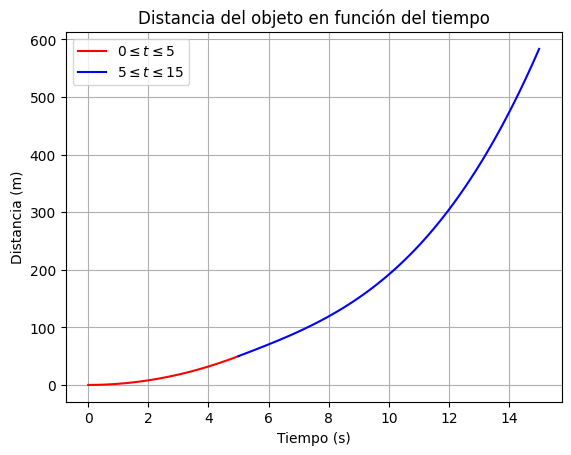

In [ ]:
t = sp.symbols('t')
vx_1 = 4*t
vx_2 = 20 + (5-t)**2

xt_1 = sp.integrate(vx_1, t)
xt_2 = sp.integrate(vx_2, t)

xt_1_num = sp.lambdify(t, xt_1, 'numpy')

x_t5 = xt_1_num(5)

xt_2_ = xt_2.subs(t,5)
C = x_t5 - xt_2_
xt_2_new = xt_2 + C

xt_2_num = sp.lambdify(t, xt_2_new, 'numpy')

t_vals_1 = np.linspace(0,5,100)
x_vals_1 = xt_1_num(t_vals_1)
t_vals_2 = np.linspace(5,15,100)
x_vals_2 = xt_2_num(t_vals_2)

plt.plot(t_vals_1, x_vals_1, 'r-', label = '$0\leq t \leq5$')
plt.plot(t_vals_2, x_vals_2, 'b-', label = '$5\leq t \leq15$')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.title('Distancia del objeto en función del tiempo')
plt.grid(True)
plt.show()

Cálculo del trabajo:

$$
W = \int_a^b F_x dx
$$

Como
$$
v_x = \frac{dx}{dt}
$$

$$
dx = v_xdt
$$

Entonces
$$
W = F_x\int_a^b v_xdt
$$

In [ ]:
#Trabajo

F_x = 200
vx_1 = 4*t
vx_2 = 20 + (5-t)**2

W_1 = F_x * sp.integrate(vx_1, (t,0,5))
W_2 = F_x * sp.integrate(vx_2, (t,5,15))

W_total = W_1 + W_2

print(f'El trabajo realizado es W={W_total.evalf():.3f}')


El trabajo realizado es W=116666.667


#3
La cantidad de masa transportada por una tuberia durante un periodo se puede calcular como

$$M = \int_{t_1}^{t_2} Q(t) c(t) \; dt$$

siendo M (masa en mg), $Q(t)$ el caudal y $c(t)$ concentración (mg/m$^3$). Sean las siguientes representaciones funcionales:

$$Q(t) = 9 + 5 \cos^2 (0.4t)$$
$$c(t) = 5e^{-0.5 t} + 2 e^{0.15 t}$$

Determine la masa transportada entre $t_1 = 2$ y $t_2 = 8 \mbox{ min}$ usando:

* Haga un gráfico del flujo y la concentración en función del tiempo.
* Determine el valor de la integral usando el método de integración de Romberg
* Compruebe sus resultado usando el método de cuadratura Gaussiana adaptativa `quad`.


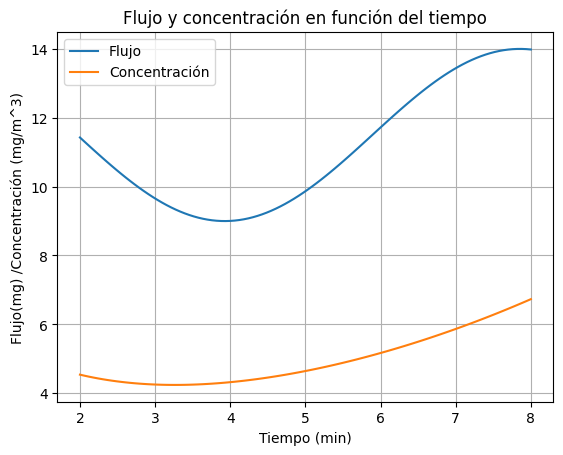

In [ ]:
#Gráfico del flujo y concentración

t_vals = np.linspace(2,8,100)
Q_t = lambda t: 9 + 5*(np.cos(0.4*t))**2
c_t = lambda t: 5*np.exp(-0.5*t) + 2*np.exp(0.15*t)

Q_vals = Q_t(t_vals)
c_vals = c_t(t_vals)

plt.plot(t_vals, Q_vals, label='Flujo')
plt.plot(t_vals, c_vals, label='Concentración')
plt.xlabel('Tiempo (min)')
plt.ylabel('Flujo(mg) /Concentración (mg/m^3)')
plt.title('Flujo y concentración en función del tiempo')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Integral Romberg

f = lambda t: Q_t(t)*c_t(t)
I = romberg(f,2,8)
print(f(2))
print(f'El valor de la integral con Romberg es: {I}')


51.868470480495574
El valor de la integral con Romberg es: 335.9625300616253


<ipython-input-72-7f8b80d65f28>:4: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  I = romberg(f,2,8)


In [ ]:
#Integral con Cuadratura Gaussiana

f = lambda t: Q_t(t)*c_t(t)
I_quad = quad(f,2,8)[0]
print(f'El valor de la integral con cuadratura gaussiana es: {I_quad}')


El valor de la integral con cuadratura gaussiana es: 335.9625300616257


#4
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

In [ ]:
def periodo(P_0, phi, k):
  f = lambda phi: 1/np.sqrt(1 - k**2 * (np.sin(phi)**2))
  integral = quad(f,0,np.pi/2)[0]
  P = ((2*P_0)/(np.pi)) * integral
  return P

In [ ]:
m = 0.02
g = 9.8
b = 0.5
l = 3
theta_0 = 0.5
theta = 1.5

I_0 = (1/3)*m*l**2

phi = np.arcsin((np.sin(theta/2))/(np.sin(theta_0/2)))
k = np.sin(theta_0/2)
P_0 = 2*np.pi*np.sqrt(I_0/(m*g*b))

P = periodo(P_0, phi, k)
print(f'El periodo de oscilación es: {P}')

El periodo de oscilación es: 4.994282710328111


<ipython-input-111-483d9f183d8d>:10: RuntimeWarning: invalid value encountered in arcsin
  phi = np.arcsin((np.sin(theta/2))/(np.sin(theta_0/2)))


#5
El departamento de transporte encuentra que la tasa a la cual los autos cruzan un puente puede ser aproximada por la función:



$$ f(t) = \frac{22.8}{3.5 + 7(t - 1.25)^4} $$



donde $t = 0 $ a las 4 pm, y se mide en horas, y $ f(t) $ se mide en autos por minuto. Estima el número total de autos que cruzan el puente entre las 4 y las 6 pm. Asegúrate de que tu estimación tenga un error menor al 5% y proporciona evidencia matemática suficiente de tu estimación de error.


In [43]:
f = lambda t: 22.8/(3.5 + 7*(t-1.25)**4)
f_por_hora = lambda t: f(t)*60

cantidad, error = quad(f_por_hora,0,2)

print(f'El número total de autos que cruzan el puente entre las 4 y las 6 pm es: {round(cantidad)}')

error_porcentual = (np.abs(cantidad - 599.511)/(599.11))*100
print(f'El error porcentual es de {error_porcentual} % (Comparando el resultado arrojado por el método quad con el resultado calculado por WolframAlpha de 599.511)')

El número total de autos que cruzan el puente entre las 4 y las 6 pm es: 600
El error porcentual es de 4.35494659402205e-05 % (Comparando el resultado arrojado por el método quad con el resultado calculado por WolframAlpha de 599.511)


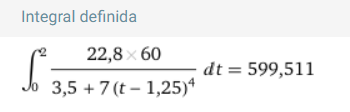

#6
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo. Para $a$ = 1, $I$ = 3, y $μ0∕4π$ = 1, calcular y graficar:

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [22]:
a = 1
I = 3
mu_0 = 4*np.pi

def A_phi(r, theta, a, I, mu_0):
  k = np.sqrt((4*a*r*np.sin(theta))/(a**2 + r**2 + 2*a*r*np.sin(theta)))
  ecuacion_K = lambda phi: 1/np.sqrt( 1 - k**2 * (np.sin(phi))**2)
  integral_K = quad(ecuacion_K,0,np.pi/2)[0]
  ecuacion_E = lambda phi: np.sqrt(1 - k**2 * (np.sin(phi))**2)
  integral_E = quad(ecuacion_E,0,np.pi/2)[0]
  return mu_0/(4*np.pi) * ((4*I*a)/(np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta)))) * (((2-k**2)*integral_K - 2*integral_E)/(k**2))


<ipython-input-22-c61d598e0f34>:12: RuntimeWarning: invalid value encountered in scalar divide
  return mu_0/(4*np.pi) * ((4*I*a)/(np.sqrt(a**2 + r**2 + 2*a*r*np.sin(theta)))) * (((2-k**2)*integral_K - 2*integral_E)/(k**2))


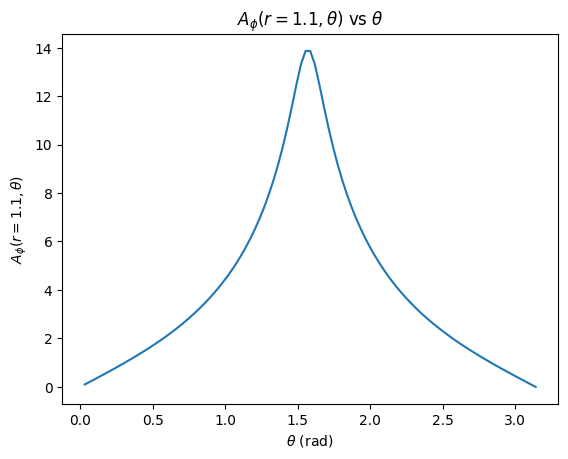

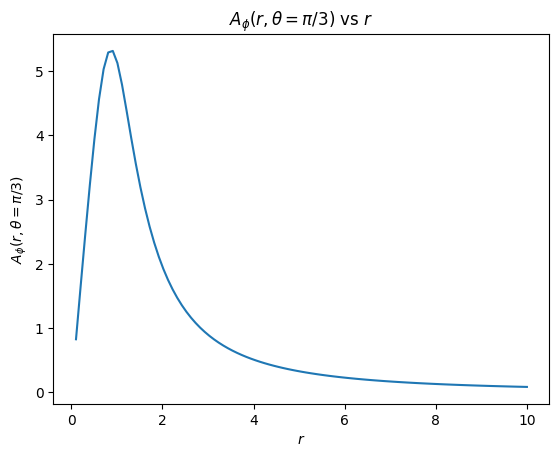

In [45]:
#a

theta_vals = np.linspace(0, np.pi, 100)
A_phi_a = [A_phi(1.1 ,theta, a, I, mu_0) for theta in theta_vals]
plt.plot(theta_vals, A_phi_a)
plt.title('$A_{\phi}(r=1.1 , \\theta )$ vs $\\theta $')
plt.xlabel('$\\theta$ (rad)')
plt.ylabel('$A_{\phi}(r=1.1 , \\theta)$')
plt.show()


#b

r_vals = np.linspace(0,10,100)
A_phi_b = [A_phi(r, np.pi/3, a, I, mu_0) for r in r_vals]
plt.plot(r_vals, A_phi_b)
plt.title('$A_{\phi}(r, \\theta = \pi/3)$ vs $r$')
plt.xlabel('$r$')
plt.ylabel('$A_{\phi}(r, \\theta=\pi/3)$')
plt.show()
